
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


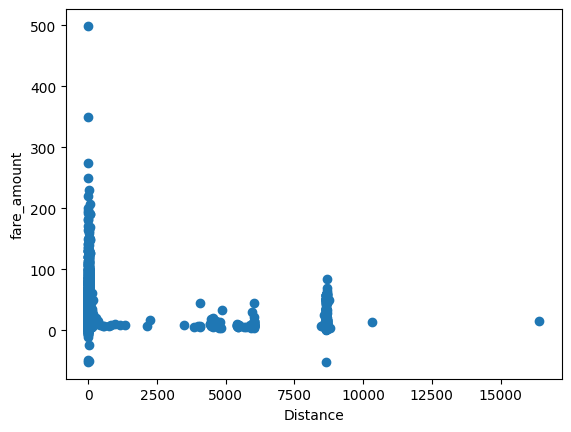

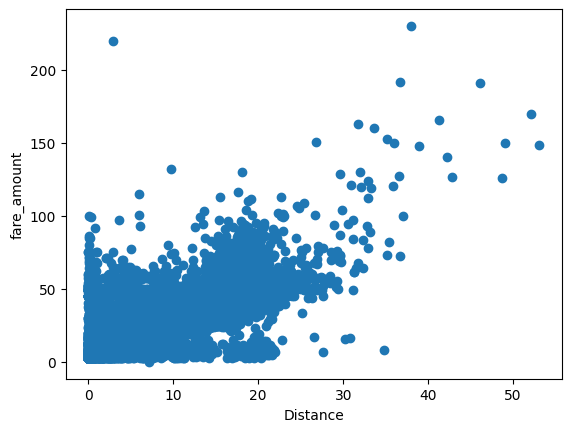

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         193481 non-null  int64  
 1   key                193481 non-null  object 
 2   fare_amount        193481 non-null  float64
 3   pickup_datetime    193481 non-null  object 
 4   pickup_longitude   193481 non-null  float64
 5   pickup_latitude    193481 non-null  float64
 6   dropoff_longitude  193481 non-null  float64
 7   dropoff_latitude   193481 non-null  float64
 8   passenger_count    193481 non-null  int64  
 9   Distance           193481 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   Distance  193

C:\Users\Anil Rathod\AppData\Local\Temp\ipykernel_16452\2398673276.py:86: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


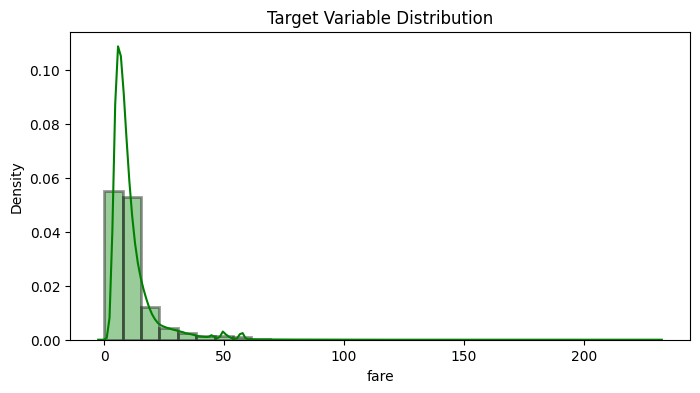

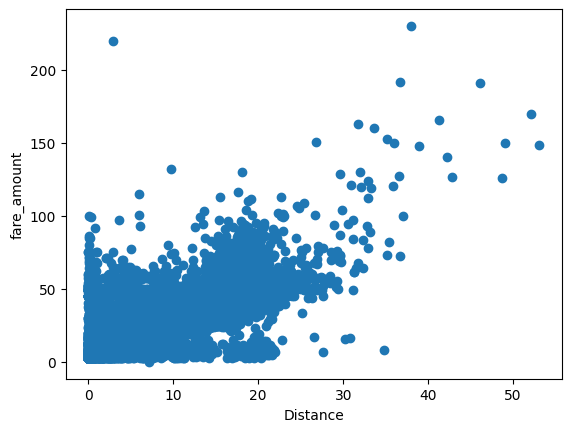

Linear Regression:
MAE: 0.23979020298617207
MSE: 0.19845894128014663
RMSE: 0.44548730765325584
R2 Score: 0.8006071032106601

Random Forest Regression:
MAE: 0.24162461813439187
MSE: 0.20217934629141932
RMSE: 0.44964357694892
R2 Score: 0.7968691898284654


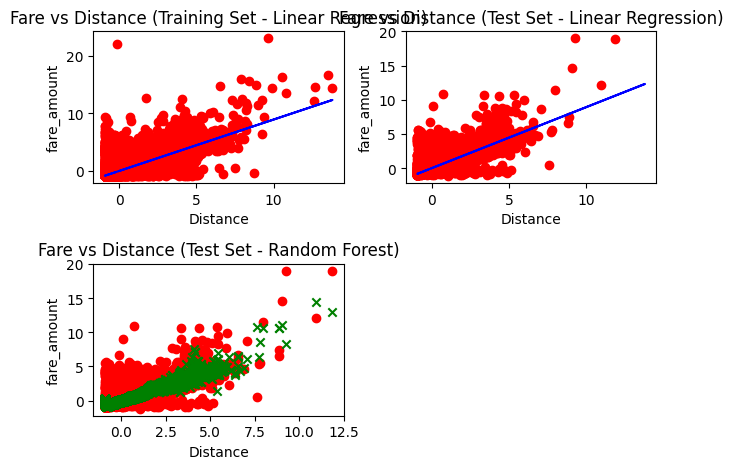

In [3]:
# First let's start with calling all the dependencies for this project 
# Make sure the required packages are installed
!pip install numpy pandas matplotlib seaborn scikit-learn

# Import necessary libraries
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\Anil Rathod\Desktop\LP III\ML\Pract - 1\uber.csv')

# Display the first few rows
df.head()

# Display the shape of the dataset
df.shape

# Get information about the dataset
df.info()

# Find any null values present
df.isnull().sum()

# Drop rows with null values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

# Calculate the distance between the pickup and drop coordinates using the Haversine formula for accuracy
def haversine(lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  # Convert degrees to radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

# Find distance traveled per ride
df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'],
                           df['pickup_latitude'], df['dropoff_latitude'])

# Round the distance to 2 decimal points
df['Distance'] = df['Distance'].astype(float).round(2) 
df.head()

# Plot Distance vs Fare Amount
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.show()

# Outliers
# Remove trips with very large distances and trips with 0 distance or fare amount
df.drop(df[df['Distance'] > 60].index, inplace=True)
df.drop(df[df['Distance'] == 0].index, inplace=True)
df.drop(df[df['fare_amount'] == 0].index, inplace=True)
df.drop(df[df['fare_amount'] < 0].index, inplace=True)
df.shape

# Remove rows with implausible fare amounts and distances
df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)].index, inplace=True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)].index, inplace=True)
df.shape

# Plot Distance vs Fare Amount after removing outliers
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.show()

# Display dataset information after cleaning
df.info()

# Create a new DataFrame with only specific columns
df2 = pd.DataFrame().assign(fare=df['fare_amount'], Distance=df['Distance'])
df2.info()

# Display the shape of the new DataFrame
df2.shape

# Plot the target fare distribution
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

# Plot Distance vs Fare Amount
plt.scatter(df2['Distance'], df2['fare'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.show()

# Define independent and dependent variables
X = df2['Distance'].values.reshape(-1, 1)  # Independent variable
Y = df2['fare'].values.reshape(-1, 1)      # Dependent variable

# Scale by StandardScaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
x_std = std.fit_transform(X)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# Simple linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

# Predict test values using linear regression
y_pred_lin = l_reg.predict(X_test)

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train.ravel())

# Predict test values using random forest regression
y_pred_rf = rf_reg.predict(X_test)

# Evaluation metrics for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2 Score:", r2_score(y_test, y_pred_lin))

# Evaluation metrics for random forest regression
print("\nRandom Forest Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Final plot of model predictions
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, l_reg.predict(X_train), color="blue")
plt.title("Fare vs Distance (Training Set - Linear Regression)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, l_reg.predict(X_train), color="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set - Linear Regression)")

plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred_rf, color='green', marker='x')
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.title("Fare vs Distance (Test Set - Random Forest)")

plt.tight_layout()
plt.show()
